In [1]:
# load all units for movie/shuffled stationary and for spontaneous stationary
# take activity averages across time and compare unit activity
# filter units based on activity
# create report similar to sfn_panel3

### Set path

In [8]:
PROJECT_PATH = "G:/Shared drives/visual_encoding"

# Unit Activity Report

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neo
from tqdm import tqdm
import os
import seaborn as sns

# custom
import sys
sys.path.append("../../")
from allen_vc.plots import sync_plot
from allen_vc.stats import run_hierarchical_bootstrap

print("Packages Imported!")

Packages Imported!


In [4]:
# plot settings
plt.style.use(f'../../stylelib/sfn_2023.mplstyle')

In [5]:
def compute_firing_rate(spiketrains):
    """ compute firing rate for each unit in a list of spiketrains 

    Parameters
    ----------
    spiketrains : list of neo.SpikeTrain objects
        list of neo.SpikeTrain objects 

    Returns
    -------
    rate : list of floats
        list of firing rates for each unit in spiketrains
    
    """
    rate = [len(st)/st.duration.magnitude for st in spiketrains]

    return rate

### Load units

In [7]:
# for each session
    # load spont_stationary block, get first segment
    # for each unit
        # for each segment in spont_stationary
            # mean firing rate and std
            
        # for each segment in spont_running
            # mean firing rate
            
        # for each segment in movie
            # 
            
        # for each segment in shuffled
            # mean firing rate
            
        # if stim <= spont_stationary - spont_std or stim >= spont_stationary + spont std
            # provide print statement
            # delete unit from shuffled and stim blocks
            
        # if spont_running <= spont_stationary - spont_std or spont_running >= spont_stationary + spont std
            # provide print statement
            # delete unit from shuffled and stim blocks
            
        # add stim firing rate and run firing rate z-scores to array

# save out filtered block
# plot z-score dist

In [8]:
# dir_results = f"{PROJECT_PATH}/data/blocks/segmented"

In [9]:
# dir_spontaneous_stationary = f"{PROJECT_PATH}/data/blocks/segmented/spontaneous_stationary"
# dir_spontaneous_running = f"{PROJECT_PATH}/data/blocks/segmented/spontaneous_running"
# dir_movie = f"{PROJECT_PATH}/data/blocks/segmented/natural_movie_one_more_repeats"
# dir_shuffled = f"{PROJECT_PATH}/data/blocks/segmented/natural_movie_one_shuffled"

# for file in tqdm(os.listdir(dir_movie)):
    
#     if file.split('.')[-1]!='mat':
#         continue
    
#     stationary_block = neo.io.NeoMatlabIO(filename=f"{dir_spontaneous_stationary}/{file}").read_block()
#     running_block = neo.io.NeoMatlabIO(filename=f"{dir_spontaneous_running}/{file}").read_block()
#     movie_block = neo.io.NeoMatlabIO(filename=f"{dir_movie}/{file}").read_block()
#     shuff_block = neo.io.NeoMatlabIO(filename=f"{dir_shuffled}/{file}").read_block()
#     session_id = file.split('_')[1].split('.')[0]
    
#     print(f"STARTING SESSION: {session_id}")
    
#     if len(stationary_block.segments)==0:
#         print("No stationary spontaneous segments for comparison!")
#         continue
    
#     movie_block.segments = np.array(movie_block.segments)[~movie_block.annotations['running']]
#     shuff_block.segments = np.array(shuff_block.segments)[~shuff_block.annotations['running']]
    
#     total_units = 0
#     stim_dropped_units = 0
#     spont_dropped_units = 0
    
#     running_Zs = []
#     stim_Zs = []
    
#     for i_train, spiketrain in enumerate(stationary_block.segments[0].spiketrains):
        
#         unit_id = spiketrain.annotations['unit_id']
        
#         stationary_rates = []
#         running_rates = []
#         stim_rates = []
        
#         for segment in stationary_block.segments:
            
#             spikes = segment.spiketrains[i_train-spont_dropped_units]
#             assert spikes.annotations['unit_id'] == unit_id, f"Unit {unit_id} not aligned in stationary"
            
#             stationary_rates.append(len(spikes)/spikes.duration.magnitude)
            
#         for segment in running_block.segments:
            
#             spikes = segment.spiketrains[i_train-spont_dropped_units]
#             assert spikes.annotations['unit_id'] == unit_id, f"Unit {unit_id} not aligned in running"
            
#             running_rates.append(len(spikes)/spikes.duration.magnitude)
            
#         for segment in movie_block.segments:
            
#             spikes = segment.spiketrains[i_train-stim_dropped_units]
#             assert spikes.annotations['unit_id'] == unit_id, f"Unit {unit_id} not aligned in movie"
            
#             stim_rates.append(len(spikes)/spikes.duration.magnitude)
            
#         for segment in shuff_block.segments:
            
#             spikes = segment.spiketrains[i_train-stim_dropped_units]
#             assert spikes.annotations['unit_id'] == unit_id, f"Unit {unit_id} not aligned in shuffled"
            
#             stim_rates.append(len(spikes)/spikes.duration.magnitude)
            
#         stationary_avg, stationary_std = np.mean(stationary_rates), np.std(stationary_rates)
#         running_avg = np.mean(running_rates)
#         stim_avg = np.mean(stim_rates)
        
#         running_Z = (running_avg - stationary_avg)/stationary_std
#         stim_Z = (stim_avg - stationary_avg)/stationary_std
        
#         running_Zs.append(running_Z)
#         stim_Zs.append(stim_Z)
        
        
#         if np.abs(stim_Z) < 1:
            
#             print(f"\tDropping Stim Unit: {unit_id}")
            
#             for segment in movie_block.segments:
                
#                 segment.spiketrains = segment.spiketrains[:i_train-stim_dropped_units] + segment.spiketrains[i_train-stim_dropped_units+1:]
            

#             for segment in shuff_block.segments:

#                 segment.spiketrains = segment.spiketrains[:i_train-stim_dropped_units] + segment.spiketrains[i_train-stim_dropped_units+1:]
                
#             stim_dropped_units += 1
            
#         if np.abs(running_Z) < 1:
            
#             print(f"\tDropping Spont Unit: {unit_id}")
            
#             for segment in stationary_block.segments:
                
#                 segment.spiketrains = segment.spiketrains[:i_train-spont_dropped_units] + segment.spiketrains[i_train-spont_dropped_units+1:]
            

#             for segment in running_block.segments:

#                 segment.spiketrains = segment.spiketrains[:i_train-spont_dropped_units] + segment.spiketrains[i_train-spont_dropped_units+1:]
                
#             spont_dropped_units += 1
            
#         total_units += 1
        
#     print(f"DROPPED {stim_dropped_units}/{total_units} STIM UNITS")
#     print(f"DROPPED {spont_dropped_units}/{total_units} SPONT UNITS\n\n")
                
#     neo.io.NeoMatlabIO(f"{dir_results}/natural_movie_one_more_repeats_filtered/{file}").write_block(movie_block)
#     neo.io.NeoMatlabIO(f"{dir_results}/natural_movie_one_shuffled_filtered/{file}").write_block(shuff_block)
#     neo.io.NeoMatlabIO(f"{dir_results}/spontaneous_stationary_filtered/{file}").write_block(stationary_block)
#     neo.io.NeoMatlabIO(f"{dir_results}/spontaneous_running_filtered/{file}").write_block(running_block)

In [54]:
# compute mean firing rate for each unit in each condition

# init
df = pd.DataFrame(columns=['session', 'unit_id', 'stimulus', 'mean_rate'])

# loop over files
files = os.listdir(f"{PROJECT_PATH}/data/blocks/segmented/spontaneous_stationary")
print(f"N files: {len(files)}")
for i_file, file in enumerate(files):
    # display progress
    print(f"Processing file {i_file+1}/{len(files)}")

    # loop over stimuli
    for folder in ['spontaneous_stationary','spontaneous_running',
                'natural_movie_one_more_repeats','natural_movie_one_shuffled']:
        
        # load block
        path = f"{PROJECT_PATH}/data/blocks/segmented/{folder}"
        block = neo.io.NeoMatlabIO(filename=f"{path}/{file}").read_block()

        # get stationary epochs only for stimulus blocks
        if folder in ['natural_movie_one_more_repeats','natural_movie_one_shuffled']:
            block.segments = np.array(block.segments)[~block.annotations['running']]

        # get unit IDs for block
        spiketrains = block.filter(objects=neo.SpikeTrain)
        unit_ids = [st.annotations['unit_id'] for st in spiketrains]
        unit_ids = np.unique(unit_ids)

        # compute firing rate for each unit
        mean_rate = np.zeros(len(unit_ids))
        for i_unit, unit_id in enumerate(unit_ids):
            st_i = block.filter(objects=neo.SpikeTrain, unit_id=unit_id)
            firing_rates = compute_firing_rate(st_i)
            mean_rate[i_unit] = np.mean(firing_rates)

        # add to dataframe
        session = [file.split('_')[1].split('.')[0]]*len(unit_ids)
        stimulus = [folder]*len(unit_ids)
        df_i = pd.DataFrame({'session': session ,'unit_id': unit_ids, 'stimulus': stimulus, 'mean_rate': mean_rate})
        df = pd.concat([df, df_i])

# reformat dataframe. each row is a unit, each column is a stimulus
df_mean = df.pivot(index='unit_id', columns='stimulus', values='mean_rate')
df_mean

N files: 23


stimulus,natural_movie_one_more_repeats,natural_movie_one_shuffled,spontaneous_running,spontaneous_stationary
unit_id,,,,
950922446,2.251515,1.280000,11.390089,7.656098
950922495,0.522727,0.580000,0.296669,0.649593
950922511,2.362121,0.873333,0.180001,0.269919
950922546,1.869697,2.460000,0.183334,0.678049
950922579,2.922727,3.813333,4.073360,1.226016
...,...,...,...,...
951187345,13.611667,22.761905,20.033333,12.640909
951187357,0.899167,0.054762,0.150000,0.124242
951187369,6.327500,4.859524,2.300000,7.534091


In [11]:
# Are the same units present in all conditions? - No. Why?

# unit count
unit_ids = df['unit_id'].unique()
print(f"total unit count: {len(unit_ids)}")

# nan count
df_nan = df_mean[df_mean.isna().any(axis=1)]
unit_ids = df_nan.index.values
print(f"N units with NaNs: {len(df_nan)}")

# count how many units and nans per stimulus (should total to total unit count)
print("\nUnits per stimulus:")
print(df.groupby('stimulus').count().head())
print("\nNans per stimulus:")
print(df_mean.isna().sum())

# print session of each unit with nans
print("\nSessions with NaNs:")
df_nan = df[df['unit_id'].isin(unit_ids)]
print(df_nan['session'].unique())


total unit count: 1850
N units with NaNs: 561

Units per stimulus:
                                session  unit_id  mean_rate
stimulus                                                   
natural_movie_one_more_repeats     1691     1691       1691
natural_movie_one_shuffled         1604     1604       1604
spontaneous_running                1629     1629       1629
spontaneous_stationary             1785     1785       1785

Nans per stimulus:
stimulus
natural_movie_one_more_repeats    159
natural_movie_one_shuffled        246
spontaneous_running               221
spontaneous_stationary             65
dtype: int64

Sessions with NaNs:
['778240327' '781842082' '794812542' '816200189' '829720705' '831882777'
 '839068429']


In [21]:
# normalize firing rates by spontaneous stationary block
# first, compute STD for spontaneous block

# init
df_std = pd.DataFrame(columns=['unit_id', 'spontaneous_stationary_std'])

# loop over files
files = os.listdir(f"{PROJECT_PATH}/data/blocks/segmented/spontaneous_stationary")
for file in files:
# file = files[0]

    # load block
    path = f"{PROJECT_PATH}/data/blocks/segmented/spontaneous_stationary"
    block = neo.io.NeoMatlabIO(filename=f"{path}/{file}").read_block()

    # get unit IDs
    spiketrains = block.filter(objects=neo.SpikeTrain)
    unit_ids = [st.annotations['unit_id'] for st in spiketrains]
    unit_ids = np.unique(unit_ids)

    # compute firing rate
    std_rate = np.zeros(len(unit_ids))
    for i_unit, unit_id in enumerate(unit_ids):
        st_i = block.filter(objects=neo.SpikeTrain, unit_id=unit_id)
        firing_rates = compute_firing_rate(st_i)
        std_rate[i_unit] = np.std(firing_rates)

    # add to dataframe
    df_i = pd.DataFrame({'unit_id': unit_ids, 'spontaneous_stationary_std': std_rate})
    df_std = pd.concat([df_std, df_i])

# normalize firing rates by spontaneous stationary block
df_norm = df_mean.copy()
df_norm = df_norm.merge(df_std, on=['unit_id'])
for var in ['natural_movie_one_more_repeats','natural_movie_one_shuffled', 'spontaneous_running']:
    df_norm[f"{var}_norm"] = (df_norm[var] - df_norm['spontaneous_stationary']) / df_norm['spontaneous_stationary_std']
df_norm

,unit_id,natural_movie_one_more_repeats,natural_movie_one_shuffled,spontaneous_running,spontaneous_stationary,spontaneous_stationary_std,natural_movie_one_more_repeats_norm,natural_movie_one_shuffled_norm,spontaneous_running_norm
0,950922446,2.251515,1.280000,11.390089,7.656098,1.543066,-3.502495,-4.132096,2.419852
1,950922495,0.522727,0.580000,0.296669,0.649593,0.357052,-0.355316,-0.194911,-0.988440
2,950922511,2.362121,0.873333,0.180001,0.269919,0.221084,9.463366,2.729341,-0.406714
3,950922546,1.869697,2.460000,0.183334,0.678049,0.419098,2.843367,4.251876,-1.180429
4,950922579,2.922727,3.813333,4.073360,1.226016,0.646043,2.626312,4.004866,4.407357
...,...,...,...,...,...,...,...,...,...
1780,951187345,13.611667,22.761905,20.033333,12.640909,1.897551,0.511584,5.333714,3.895771
1781,951187357,0.899167,0.054762,0.150000,0.124242,0.066044,11.733468,-1.052035,0.390007
1782,951187369,6.327500,4.859524,2.300000,7.534091,2.134972,-0.565155,-1.252741,-2.451597
1783,951187421,1.915000,1.788095,1.883333,2.648485,1.015025,-0.722627,-0.847654,-0.753825


In [14]:
# drop NaN and inf for plotting
df_plt = df_norm.replace([np.inf, -np.inf], np.nan)
df_plt.dropna(inplace=True)
df_plt

,unit_id,natural_movie_one_more_repeats,natural_movie_one_shuffled,spontaneous_running,spontaneous_stationary,spontaneous_stationary_std,natural_movie_one_more_repeats_norm,natural_movie_one_shuffled_norm,spontaneous_running_norm
0,950922446,2.251515,1.280000,11.390089,7.656098,1.543066,-3.502495,-4.132096,2.419852
1,950922495,0.522727,0.580000,0.296669,0.649593,0.357052,-0.355316,-0.194911,-0.988440
2,950922511,2.362121,0.873333,0.180001,0.269919,0.221084,9.463366,2.729341,-0.406714
3,950922546,1.869697,2.460000,0.183334,0.678049,0.419098,2.843367,4.251876,-1.180429
4,950922579,2.922727,3.813333,4.073360,1.226016,0.646043,2.626312,4.004866,4.407357
...,...,...,...,...,...,...,...,...,...
1780,951187345,13.611667,22.761905,20.033333,12.640909,1.897551,0.511584,5.333714,3.895771
1781,951187357,0.899167,0.054762,0.150000,0.124242,0.066044,11.733468,-1.052035,0.390007
1782,951187369,6.327500,4.859524,2.300000,7.534091,2.134972,-0.565155,-1.252741,-2.451597
1783,951187421,1.915000,1.788095,1.883333,2.648485,1.015025,-0.722627,-0.847654,-0.753825


Text(0.5, 0, 'Mean Firing Rate Z-Score')

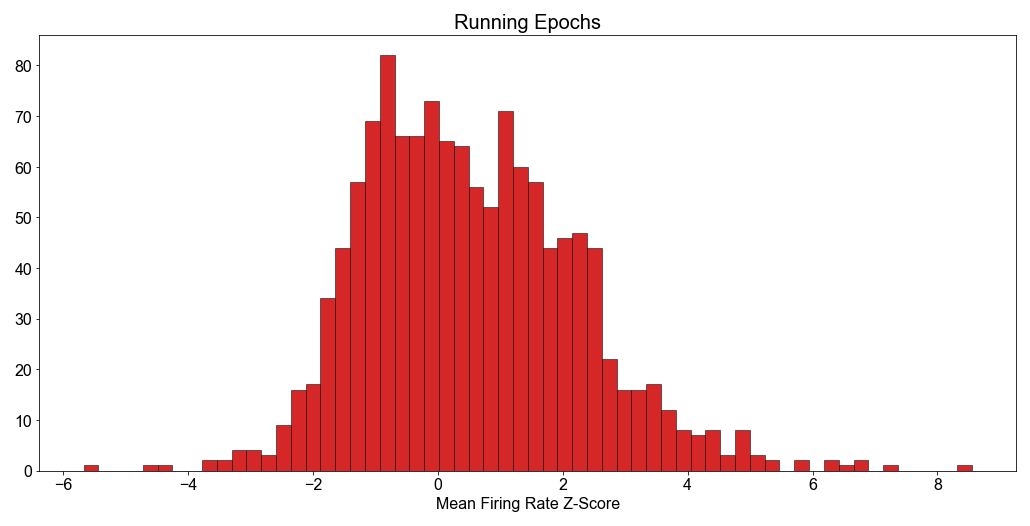

In [15]:
# plot running response

# remove outliers
running_Zs = df_plt['spontaneous_running_norm'].values
running_Zs = running_Zs[running_Zs<20]

# plot
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(running_Zs, bins=60, color='#d62728', edgecolor='black', linewidth=0.5)
plt.title('Running Epochs') 
plt.xlabel('Mean Firing Rate Z-Score') 

Text(0.5, 0, 'Mean Firing Rate Z-Score')

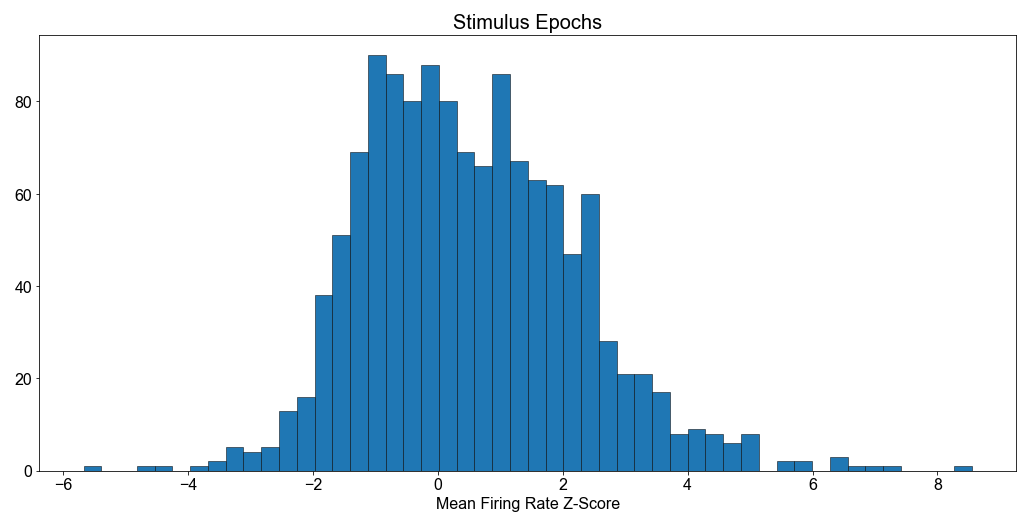

In [16]:
# plot stimulus response

# remove outliers
stim_Zs = df_plt['spontaneous_running_norm'].values
stim_Zs = stim_Zs[stim_Zs<20]

# plot
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(stim_Zs, bins=50, color='#1f77b4', edgecolor='black', linewidth=0.5)
plt.title('Stimulus Epochs') 
plt.xlabel('Mean Firing Rate Z-Score') 

In [28]:
# filter for task-active units only

# label visually responsive units
df_norm['vis_responsive'] = 0
threshold = 2
df_norm.loc[(df_norm['natural_movie_one_more_repeats_norm']<=-threshold) | \
            (df_norm['natural_movie_one_more_repeats_norm']>=threshold), 'vis_responsive'] = 1

# correct for single epoch instance in which std is 0
df_norm.loc[df_norm['spontaneous_stationary_std']==0, 'vis_responsive'] = 0

# filter for task-active units
df_active = df_norm[df_norm['vis_responsive']==1]
df_inactive = df_norm[df_norm['vis_responsive']==0]
print(f"N total units: {len(df_norm)}")
print(f"N task-active units: {len(df_active)}")

N total units: 1785
N task-active units: 375


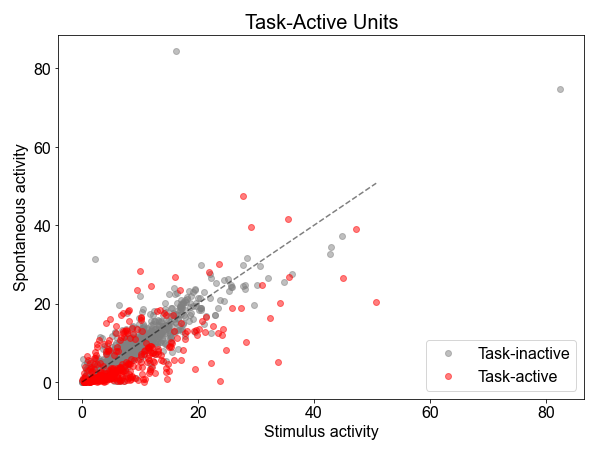

In [32]:
#  plot task-active units

# plot
fig, ax = plt.subplots(1,1, figsize=[8,6])
ax.plot(df_inactive['natural_movie_one_more_repeats'], df_inactive['spontaneous_stationary'], 'o', color='grey', alpha=0.5)
ax.plot(df_active['natural_movie_one_more_repeats'], df_active['spontaneous_stationary'], 'o', color='red', alpha=0.5)

# annotate
max = np.max([df_active['natural_movie_one_more_repeats'].max(), df_active['spontaneous_stationary'].max()])
ax.plot([0, max], [0, max], '--', color='black', alpha=0.5)
ax.set(xlabel="Stimulus activity", ylabel="Spontaneous activity", title="Task-Active Units")
ax.legend(['Task-inactive', 'Task-active'])
# ax.set_xlim([0, 5])
# ax.set_ylim([0, 5])
plt.show()


N total units: 1850
N task-active units: 929


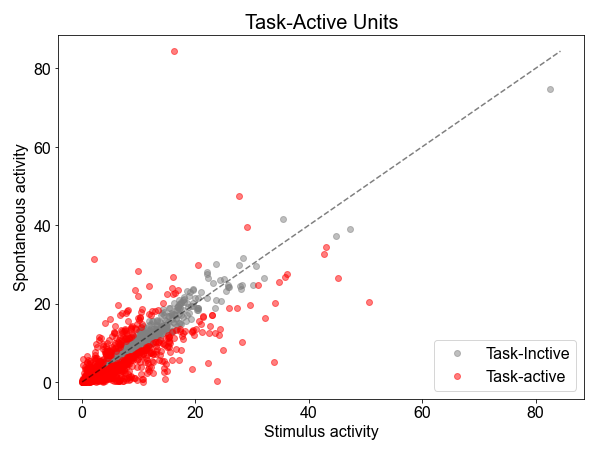

In [36]:
# normalize firing rates by spontaneous stationary block 
# percent change (rather than z-score), motivated by low trial counts resulting in STD=0

# compute percent change
df_norm = df_mean.copy()
for var in ['natural_movie_one_more_repeats','natural_movie_one_shuffled', 'spontaneous_running']:
    df_norm[f"{var}_norm"] = (np.abs(df_norm[var] - df_norm['spontaneous_stationary'])) / df_norm['spontaneous_stationary']

# filter for task-active units only
df_norm['vis_responsive'] = 0
threshold = 0.25
df_norm.loc[(df_norm['natural_movie_one_more_repeats_norm']>=(threshold)), 'vis_responsive'] = 1

# filter for task-active units
df_active = df_norm[df_norm['vis_responsive']==1]
df_inactive = df_norm[df_norm['vis_responsive']==0]
print(f"N total units: {len(df_norm)}")
print(f"N task-active units: {len(df_active)}")

# plot
fig, ax = plt.subplots(1,1, figsize=[8,6])
ax.plot(df_inactive['natural_movie_one_more_repeats'], df_inactive['spontaneous_stationary'], 'o', color='grey', alpha=0.5)
ax.plot(df_active['natural_movie_one_more_repeats'], df_active['spontaneous_stationary'], 'o', color='red', alpha=0.5)
max = np.max([df_active['natural_movie_one_more_repeats'].max(), df_active['spontaneous_stationary'].max()])
ax.plot([0, max], [0, max], '--', color='black', alpha=0.5)
ax.set(xlabel="Stimulus activity", ylabel="Spontaneous activity", title="Task-Active Units")
ax.legend(['Task-Inctive', 'Task-active'])
# ax.set_xlim([0, 2])
# ax.set_ylim([0, 2])
plt.show()

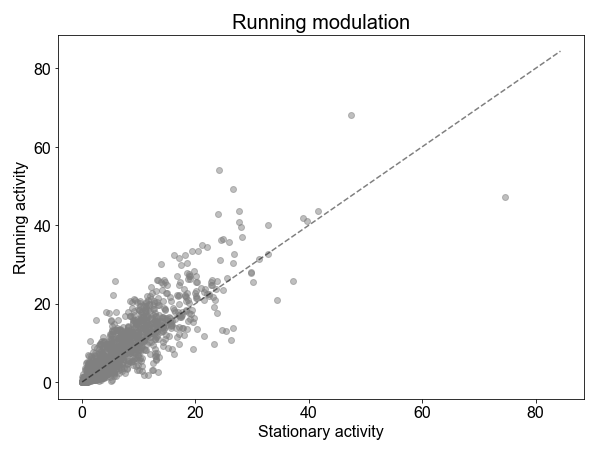

In [19]:
# plot running response
fig, ax = plt.subplots(1,1, figsize=[8,6])
ax.plot(df_norm['spontaneous_stationary'], df_norm['spontaneous_running'], 'o', color='grey', alpha=0.5)
max = np.max([df_norm['spontaneous_running'].max(), df_norm['spontaneous_stationary'].max()])
ax.plot([0, max], [0, max], '--', color='black', alpha=0.5)
ax.set(xlabel="Stationary activity", ylabel="Running activity", title="Running modulation")
# ax.set_xlim([0, 2])
# ax.set_ylim([0, 2])
plt.show()

In [37]:
# save to file
fname_out = f"{PROJECT_PATH}/data/results/unit_selection.csv"
df_norm.to_csv(fname_out)

In [ ]:
# NOTES: Only stationary epochs from the movie and shuffled blocks are kept

### plot unit effects

In [9]:
fname = f"{PROJECT_PATH}/data/results/unit_selection.csv"
df = pd.read_csv(fname)
df

,unit_id,natural_movie_one_more_repeats,natural_movie_one_shuffled,spontaneous_running,spontaneous_stationary,natural_movie_one_more_repeats_norm,natural_movie_one_shuffled_norm,spontaneous_running_norm,vis_responsive
0,950922446,2.251515,1.280000,11.390089,7.656098,0.705919,0.832813,0.487715,1
1,950922495,0.522727,0.580000,0.296669,0.649593,0.195301,0.107134,0.543301,0
2,950922511,2.362121,0.873333,0.180001,0.269919,7.751232,2.235542,0.333130,1
3,950922546,1.869697,2.460000,0.183334,0.678049,1.757467,2.628058,0.729616,1
4,950922579,2.922727,3.813333,4.073360,1.226016,1.383922,2.110345,2.322435,1
...,...,...,...,...,...,...,...,...,...
1845,951187345,13.611667,22.761905,20.033333,12.640909,0.076795,0.800654,0.584802,0
1846,951187357,0.899167,0.054762,0.150000,0.124242,6.237195,0.559233,0.207317,1
1847,951187369,6.327500,4.859524,2.300000,7.534091,0.160151,0.354995,0.694721,0
1848,951187421,1.915000,1.788095,1.883333,2.648485,0.276945,0.324861,0.288902,1


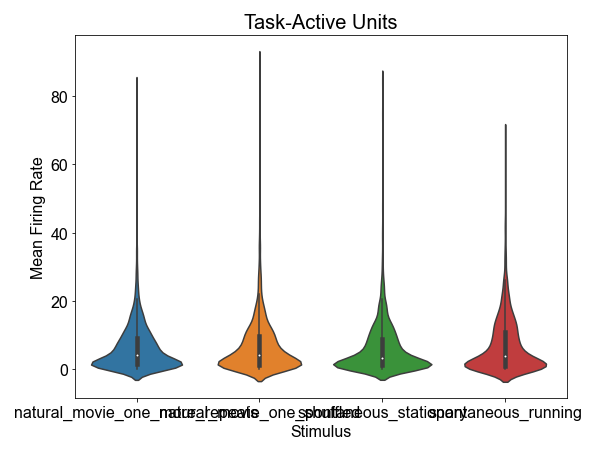

In [15]:
# plot

# melt dataframe
df_melt = df.melt(id_vars=['unit_id', 'vis_responsive'], 
                    value_vars=['natural_movie_one_more_repeats', 'natural_movie_one_shuffled', 
                                'spontaneous_stationary', 'spontaneous_running'],
                    var_name='stimulus', value_name='rate')

# plot
fig, ax = plt.subplots(1,1, figsize=[8,6])
sns.violinplot(data=df_melt, x='stimulus', y='rate', split=True, ax=ax)
ax.set(xlabel="Stimulus", ylabel="Mean Firing Rate", title="Task-Active Units")
plt.show()

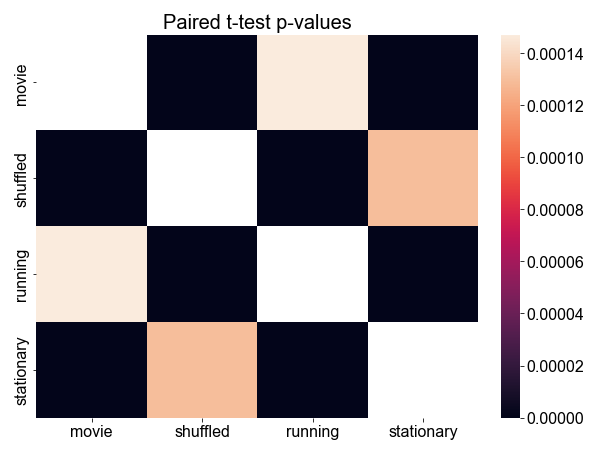

Paired t-test p-values
[[           nan 2.25851266e-07 1.47216084e-04 1.11463311e-07]
 [2.25851266e-07            nan 8.07061932e-11 1.29408119e-04]
 [1.47216084e-04 8.07061932e-11            nan 3.86849859e-30]
 [1.11463311e-07 1.29408119e-04 3.86849859e-30            nan]]

Paired t-test t-values
[[         nan  -5.20063103   3.80438803  -5.33342196]
 [  5.20063103          nan   6.5433616   -3.83844603]
 [ -3.80438803  -6.5433616           nan -11.65025591]
 [  5.33342196   3.83844603  11.65025591          nan]]


In [50]:
# run paired ttest between conditions
# (heirarchical bootstrap is moer ideal)

# import
from scipy.stats import ttest_rel

# init
vars = ['natural_movie_one_more_repeats', 'natural_movie_one_shuffled', 'spontaneous_stationary', 'spontaneous_running']
t_vals = np.zeros((len(vars),len(vars)))
p_vals = np.zeros((len(vars),len(vars)))

# run
for i0, var0 in enumerate(vars):
    for i1, var1 in enumerate(vars):
        # get data
        data0 = df[var0].values
        data1 = df[var1].values

        # remove nan
        nan_mask = (~np.isnan(data0)) & (~np.isnan(data1))
        data0 = data0[nan_mask]
        data1 = data1[nan_mask]

        # run
        t_vals[i0, i1], p_vals[i0, i1] = ttest_rel(data0, data1)

# plot
fig, ax = plt.subplots(1,1, figsize=[8,6])
sns.heatmap(p_vals, ax=ax)
ax.set(xticklabels=['movie', 'shuffled', 'running', 'stationary'], yticklabels=['movie', 'shuffled', 'running', 'stationary'])
ax.set(title="Paired t-test p-values")
plt.show()

print("Paired t-test p-values")
print(p_vals)
print("\nPaired t-test t-values")
print(t_vals)

p-value: 0.0
p-boot: 0.999995


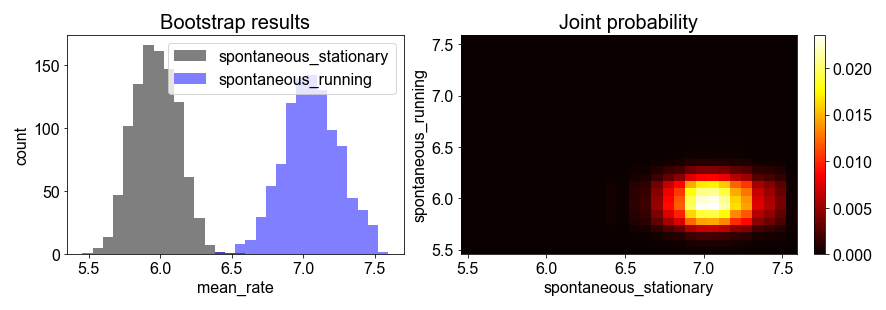

(0.0,
 0.999995,
 array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e-06, 1.0000e-06,
         8.0000e-06, 1.1000e-05, 3.0000e-05, 5.4000e-05, 7.2000e-05,
         1.2000e-04, 1.4000e-04, 1.4200e-04, 1.3000e-04, 9.9000e-05,
         8.6000e-05, 4.5000e-05, 3.5000e-05, 2.3000e-05, 2.0000e-06],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e-05, 5.0000e-06,
         4.0000e-05, 5.5000e-05, 1.5000e-04, 2.7000e-04, 3.6000e-04,
         6.0000e-04, 7.0000e-04, 7.1000e-04, 6.5000e-04, 4.9500e-04,
         4.3000e-04, 2.2500e-04, 1.7500e-04, 1.1500e-04, 1.0000e-05],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000

In [59]:
# run hierarchical bootstrap

# Set default parameters for hierarchical bootstrap
bootstrap_params = {
    'df': None,
    'variable': 'mean_rate',
    'condition': 'stimulus',
    'level_1': 'unit_id',
    'level_2': 'session',
    'verbose': True,
    'plot': True
}

# run stationary vs running comparison
bootstrap_params['df'] = df[(df['stimulus']=='spontaneous_stationary')| \
                            (df['stimulus']=='spontaneous_running')]  
run_hierarchical_bootstrap(**bootstrap_params)

In [60]:
# run spontaneous vs stimulus comparison
bootstrap_params['df'] = df[(df['stimulus']=='spontaneous_stationary')| \
                            (df['stimulus']=='natural_movie_one_more_repeats')]  
run_hierarchical_bootstrap(**bootstrap_params)

In [ ]:
# run movie v. shuffled comparison
bootstrap_params['df'] = df[(df['stimulus']=='natural_movie_one_more_repeats')| \
                            (df['stimulus']=='natural_movie_one_shuffled')]  
run_hierarchical_bootstrap(**bootstrap_params)

### Compute Spike Stats

In [ ]:
# HERE: RUN code/compute_spike_stats.py for each condition

### Plot Metric Comparisons

In [ ]:
# load spike stats from spontaneous block
df_running = pd.read_csv(f'{PROJECT_PATH}/data/spike_stats/region_metrics/spontaneous_running_filtered.csv').assign(state='running').assign(block='behavior')
df_stationary = pd.read_csv(f'{PROJECT_PATH}/data/spike_stats/region_metrics/spontaneous_stationary_filtered.csv').assign(state='stationary').assign(block='behavior')

# load spike stats from movie blocks
df_movie = pd.read_csv(f'{PROJECT_PATH}/data/spike_stats/region_metrics/natural_movie_one_more_repeats_filtered.csv').assign(state='movie').assign(block='presentation')
df_shuffled = pd.read_csv(f'{PROJECT_PATH}/data/spike_stats/region_metrics/natural_movie_one_shuffled_filtered.csv').assign(state='shuffled').assign(block='presentation')

# join
metric_df = pd.concat([df_running, df_stationary, df_movie, df_shuffled], ignore_index=True).drop(columns=['running'])

In [91]:
# print some info

# mean rate
print("mean rates:")
print(metric_df[metric_df['brain_structure']=='VISp']['mean_firing_rate'].mean())
print(metric_df[metric_df['brain_structure']=='LGd']['mean_firing_rate'].mean())

# nan count
print("\nNans per metric:")
print(metric_df.isna().sum())

print("\nNans per behavior:")
print(metric_df[metric_df['coefficient_of_variation'].isna()]['state'].value_counts())


In [ ]:
# drop null values
# metric_df = metric_df.dropna()

In [ ]:
# define metrics to be plotted 
metrics = ['mean_firing_rate', 'spike_distance']
conditions = ['running', 'stationary', 'movie', 'shuffled']

p_vals = None #[[0.0, 0.424], [0.0, 0.09], [0.003, 0.13], [0.185,0.459]]
colors = ['#d62728', '#ff7f0e', '#1f77b4', '#2ca02c']


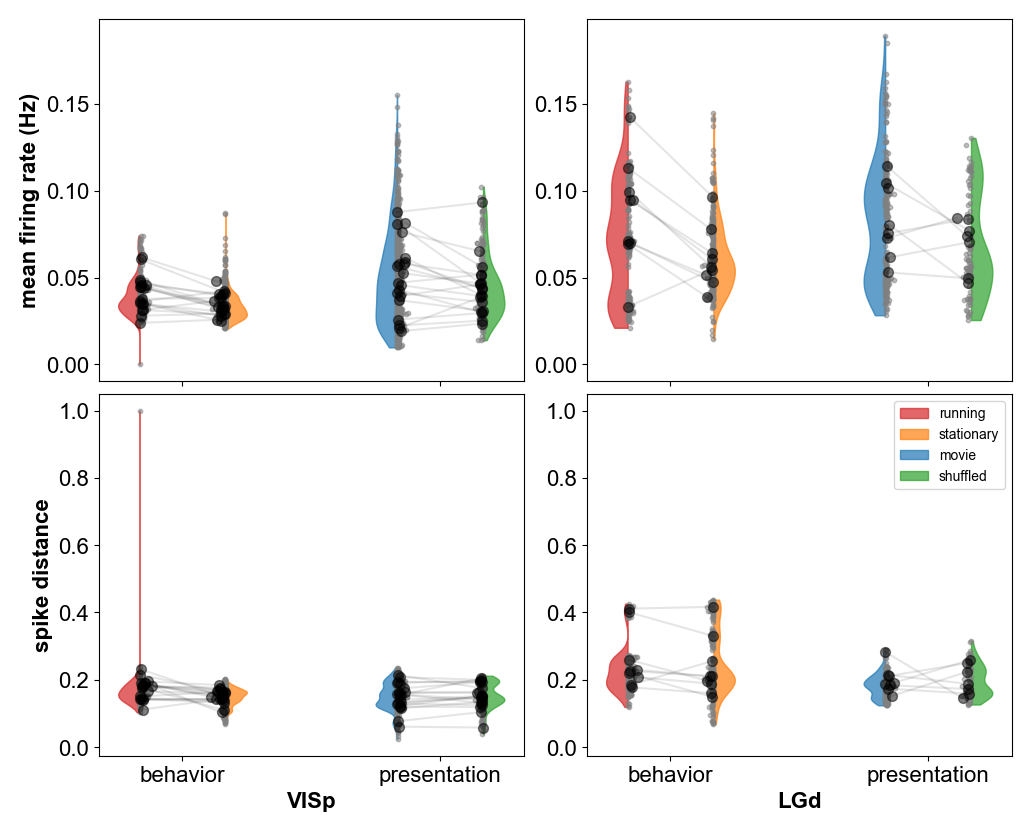

In [ ]:
# plot all epochs
sync_plot(metric_df, metrics, conditions, alpha=0.7, p_vals=p_vals,
          ylabels=['mean firing rate (Hz)', 'spike distance'], colors=colors);

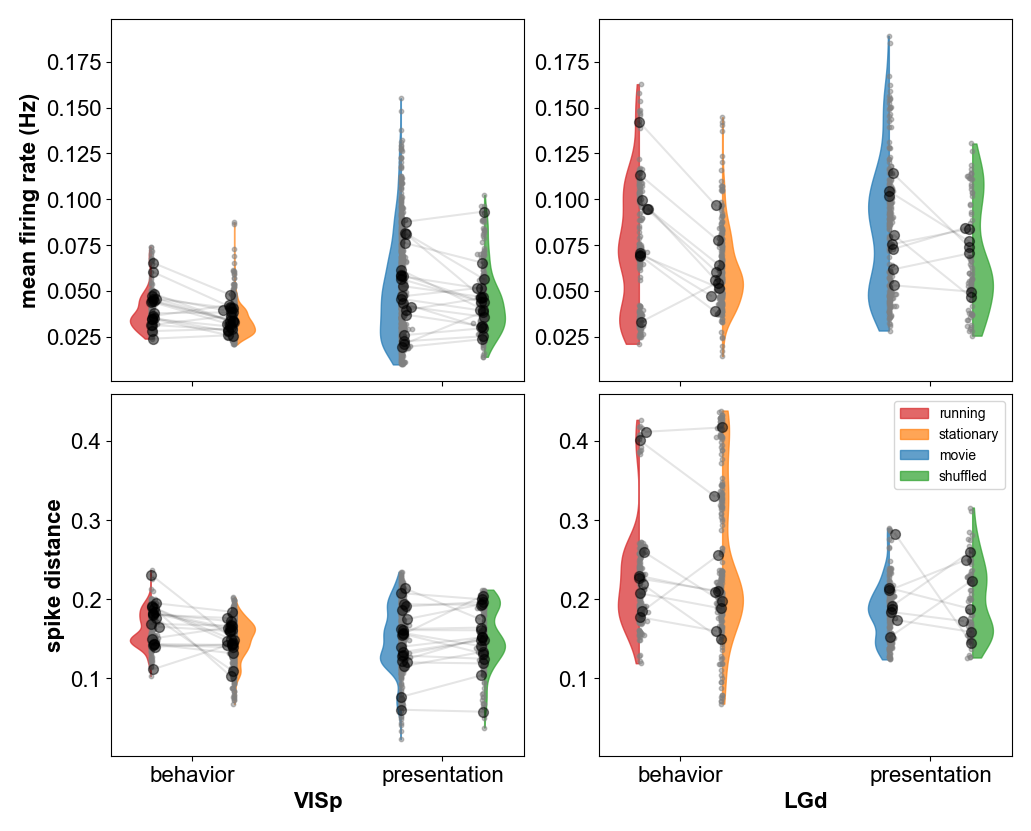

In [ ]:
# IS THIS STILL NECESSARY?

# remove outliers
no_outliers_metric_df = metric_df[metric_df['spike_distance'] < 1]

# plot
sync_plot(no_outliers_metric_df, metrics, conditions, p_vals=p_vals, alpha=0.7, 
          ylabels=['mean firing rate (Hz)', 'spike distance'], colors=colors);

### Hierarchical Bootstrap

In [ ]:
# Set default parameters for hierarchical bootstrap
bootstrap_params = {
    'df': None,
    'variable': None,
    'condition': 'state',
    'level_1': 'session',
    'level_2': 'epoch_idx',
    'verbose': True,
    'plot': True
}

COMPUTING HIERARCHICAL BOOTSTRAP FOR 'mean_firing_rate' IN 'VISp' FOR 'behavior' TRIALS


p-value: 0.012
p-boot: 0.013692


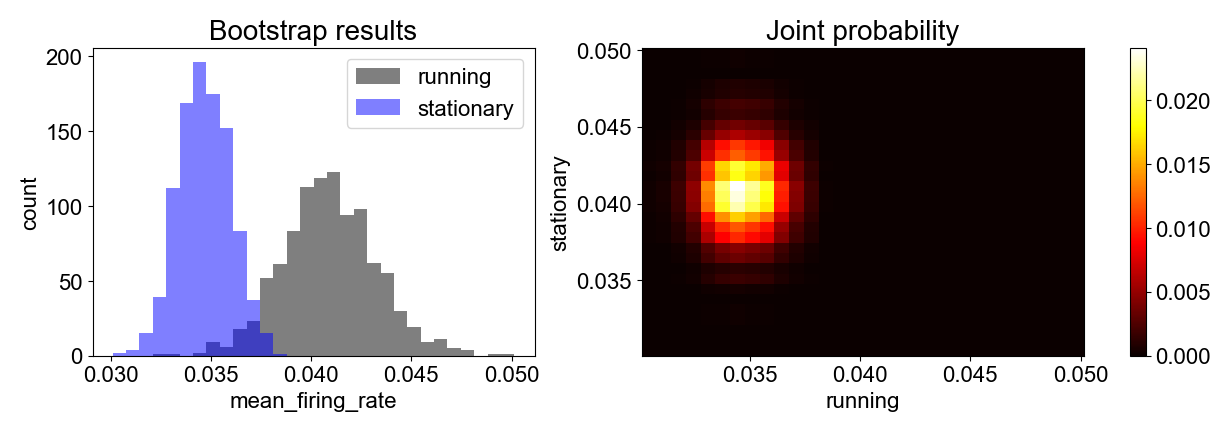

COMPUTING HIERARCHICAL BOOTSTRAP FOR 'mean_firing_rate' IN 'VISp' FOR 'presentation' TRIALS


p-value: 0.137
p-boot: 0.153544


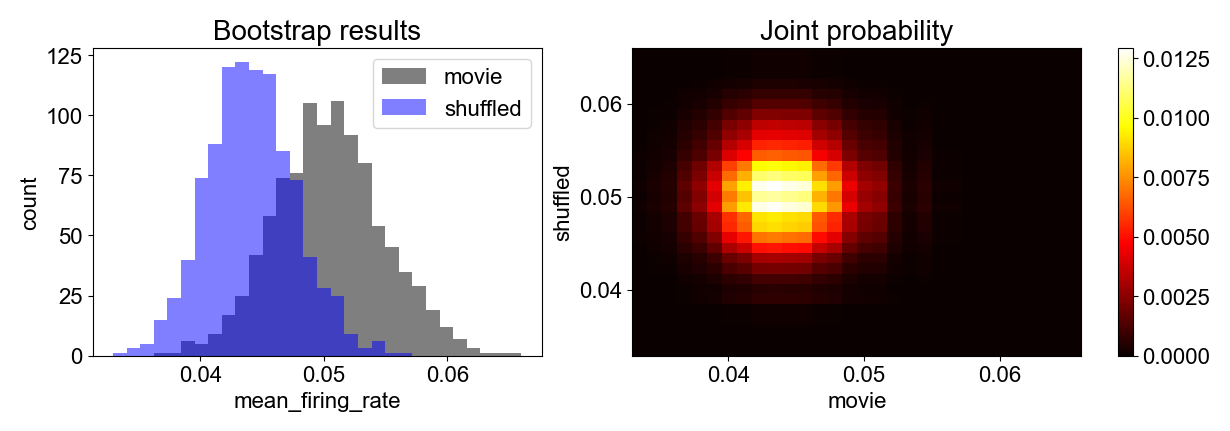

COMPUTING HIERARCHICAL BOOTSTRAP FOR 'mean_firing_rate' IN 'LGd' FOR 'behavior' TRIALS


p-value: 0.013
p-boot: 0.011977


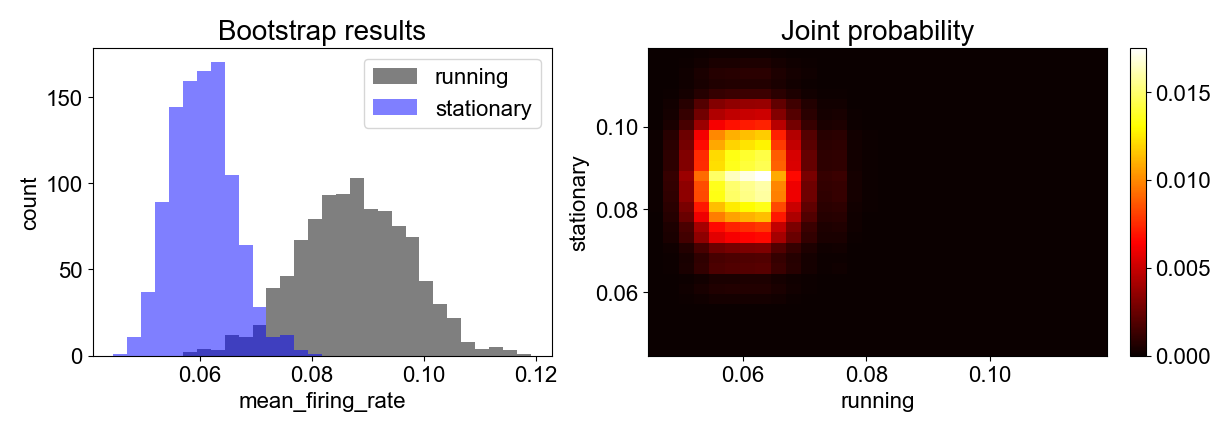

COMPUTING HIERARCHICAL BOOTSTRAP FOR 'mean_firing_rate' IN 'LGd' FOR 'presentation' TRIALS


p-value: 0.077
p-boot: 0.10652


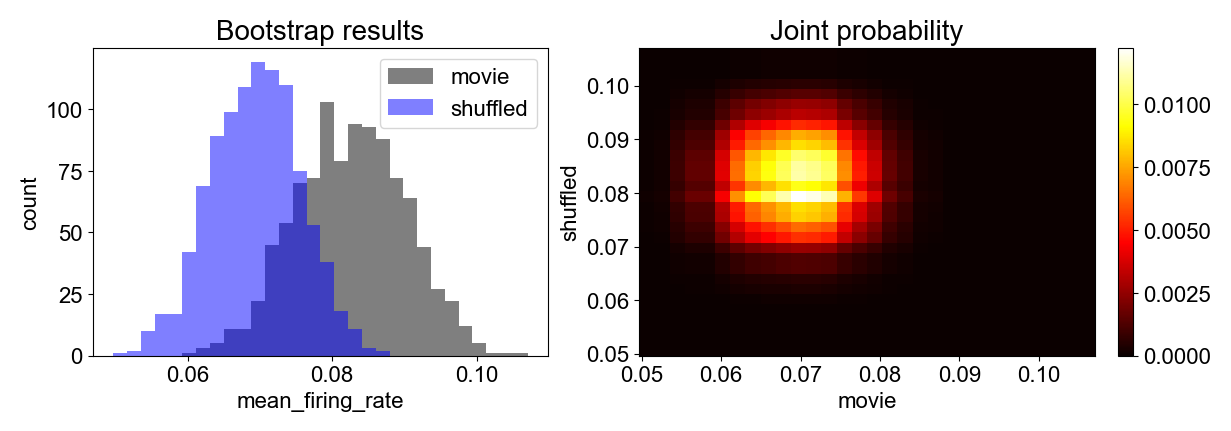

In [ ]:
# offset analysis
variable = 'mean_firing_rate'
bootstrap_params['variable'] = variable
for region in metric_df['brain_structure'].unique():
    for block in metric_df['block'].unique():
        print(f'COMPUTING HIERARCHICAL BOOTSTRAP FOR \'{variable}\' IN \'{region}\' FOR \'{block}\' TRIALS\n\n')
        
        bootstrap_params['df'] = metric_df[(metric_df['brain_structure']==region)&(metric_df['block']==block)]
        
        run_hierarchical_bootstrap(**bootstrap_params)

COMPUTING HIERARCHICAL BOOTSTRAP FOR 'spike_distance' IN 'VISp' FOR 'behavior' TRIALS


p-value: 0.005
p-boot: 0.007582000000000002


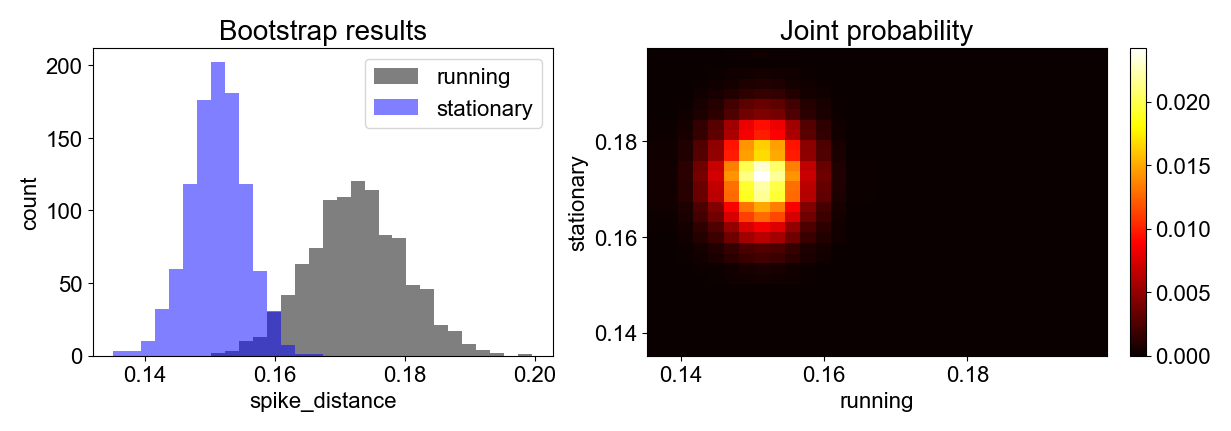

COMPUTING HIERARCHICAL BOOTSTRAP FOR 'spike_distance' IN 'VISp' FOR 'presentation' TRIALS


p-value: 0.401
p-boot: 0.6449390000000002


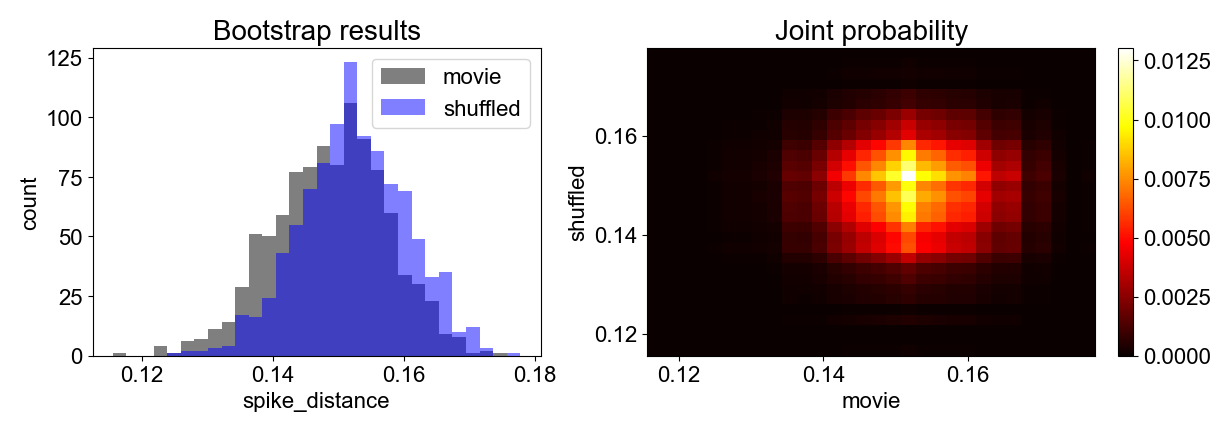

COMPUTING HIERARCHICAL BOOTSTRAP FOR 'spike_distance' IN 'LGd' FOR 'behavior' TRIALS


p-value: 0.297
p-boot: 0.334276


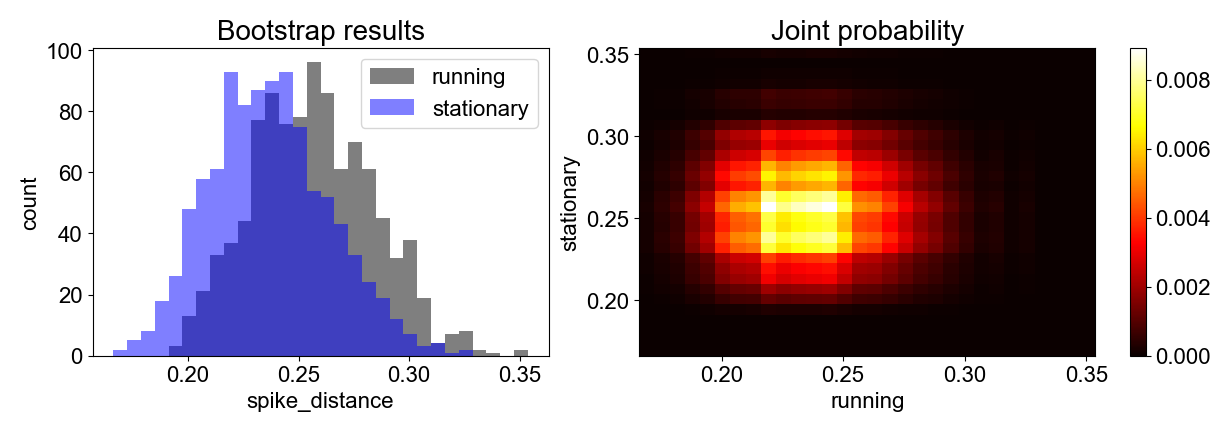

COMPUTING HIERARCHICAL BOOTSTRAP FOR 'spike_distance' IN 'LGd' FOR 'presentation' TRIALS


p-value: 0.469
p-boot: 0.5172220000000001


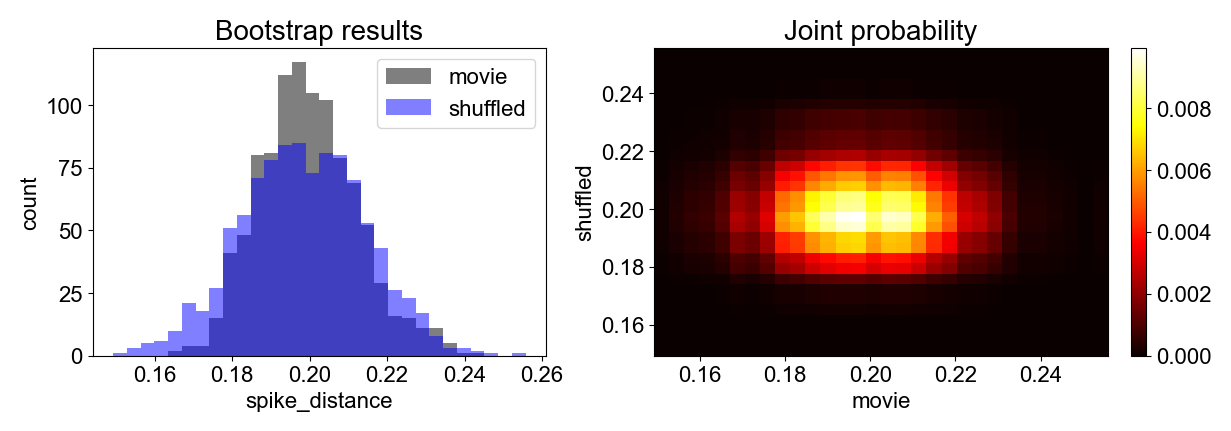

In [ ]:
# spike-distance analysis
variable = 'spike_distance'
bootstrap_params['variable'] = variable
for region in metric_df['brain_structure'].unique():
    for block in metric_df['block'].unique():
        print(f'COMPUTING HIERARCHICAL BOOTSTRAP FOR \'{variable}\' IN \'{region}\' FOR \'{block}\' TRIALS\n\n')
        
        bootstrap_params['df'] = metric_df[(metric_df['brain_structure']==region)&(metric_df['block']==block)]
        
        run_hierarchical_bootstrap(**bootstrap_params)